<a href="https://colab.research.google.com/github/macgyver121/DADS5001/blob/main/week7/Exercises_with_solutions_chipote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex1 - Filtering and Sorting Data

Check out [Chipotle Exercises Video Tutorial](https://youtu.be/ZZPiWZpdekA) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
pd.options.display.max_columns=20

### Step 2. Import the dataset from this [URL](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 4. Sort by the name of the item

In [ ]:
#chipo.item_name.sort_values()

# OR

chipo.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### Step 5. What was the quantity of the most expensive item ordered?

In [ ]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


### Step 6. How many times was a Veggie Salad Bowl ordered?

In [ ]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]
chipo_salad

len(chipo_salad)

18

### Step 7. How many times did someone order more than one Canned Soda?

In [ ]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
chipo_drink_steak_bowl
len(chipo_drink_steak_bowl)

20

### Step 8. How many products cost more than $10.00?

In [ ]:
# clean the item_price column and transform it in a float
if chipo.item_price[0] == '$':
  prices = [float(value[1 : -1]) for value in chipo.item_price]

# reassign the column with the cleaned prices
chipo.item_price = prices

# delete the duplicates in item_name, quantity, and choice_description
chipo_filtered = chipo.drop_duplicates(['item_name','quantity','choice_description'])
print(chipo_filtered.shape)

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
print(chipo_one_prod)

# chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()
# chipo_one_prod[chipo_one_prod['item_price']>10]

chipo.query('item_price > 10').item_name.nunique()


(1949, 5)
      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
5            3         1                           Chicken Bowl   
...        ...       ...                                    ...   
4602      1827         1                       Barbacoa Burrito   
4607      1829         1                          Steak Burrito   
4610      1830         1                          Steak Burrito   
4611      1830         1                         Veggie Burrito   
4612      1831         1                          Carnitas Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [C

31

### Step 9. What is the price of each item? 

In [ ]:
chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] == 1)]

,order_id,quantity,item_name,choice_description,item_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
42,20,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


# Visualization

In [3]:
import pandas as pd
import numpy as np

In [5]:
chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [18]:
chipo['item_price'] = chipo['item_price'].agg(lambda x : x.replace('$', '')).astype(float)

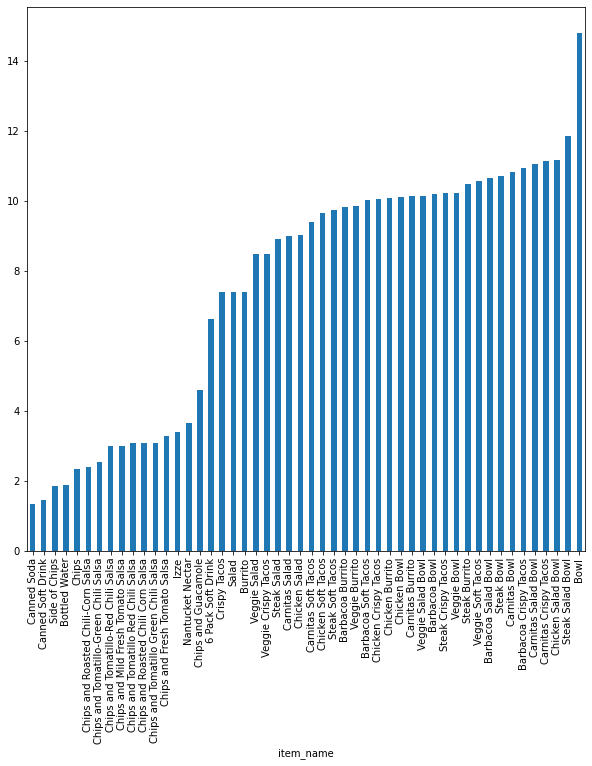

In [35]:
chipo.groupby('item_name').mean().sort_values(by = 'item_price')['item_price'].plot.bar(figsize=(10, 10))

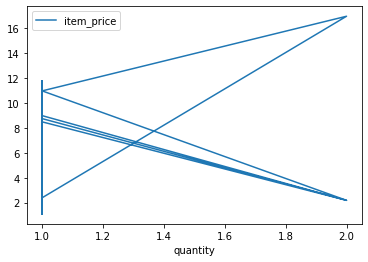

In [46]:
chipo.iloc[0:100].plot('quantity', 'item_price')

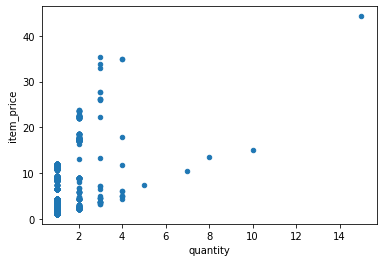

In [51]:
chipo.plot.scatter('quantity', 'item_price')